In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA,KernelPCA
from sklearn.datasets import make_circles 

In [6]:
np.random

X,y = make_circles(n_samples=400, factor=.3, noise=.05)

kpca = KernelPCA(kernel="rbf",fit_inverse_transform=True, gamma=10)
Xkpca = kpca.fit_transform(X)
Xback = kpca.inverse_transform(Xkpca)

pca = PCA()

Xpca = pca.fit_transform(X)



Plotting results

In [25]:
plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")

reds = y = y==0
blues= y = y==1
plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")


X1,X2 = np.meshgrid(np.linspace(-1.5,1.5,50),np.linspace(-1.5, 1.5, 50))

X_grid = np.array([np.ravel(X1),np.ravel(X2)]).T

Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)





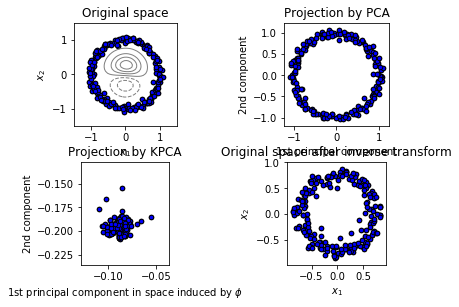

In [26]:
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.scatter(Xpca[reds, 0], Xpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(Xpca[blues, 0], Xpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")






plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(Xkpca[reds, 0], Xkpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(Xkpca[blues, 0], Xkpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")




plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(Xback[reds, 0], Xback[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(Xback[blues, 0], Xback[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)



plt.show()